#Decision Tree and Naive Bayes Cross-Validation

###Author: Frederico Tremonti


#Task I: Data Exploration and Preparation

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from google.colab import drive

from sklearn.model_selection import train_test_split, cross_validate
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report
from sklearn.naive_bayes import CategoricalNB


drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
df = pd.read_csv('/content/drive/MyDrive/IS4482_DataSets/CD_additional_modified-v2.csv')

#### High-Level Analysis of the Dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4117 entries, 0 to 4116
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      4117 non-null   int64  
 1   age             4117 non-null   int64  
 2   job             4117 non-null   object 
 3   marital         4117 non-null   object 
 4   education       4117 non-null   object 
 5   default         4117 non-null   object 
 6   housing         4117 non-null   object 
 7   loan            4117 non-null   object 
 8   contact         4117 non-null   object 
 9   month           4117 non-null   object 
 10  day_of_week     4117 non-null   object 
 11  duration        4117 non-null   int64  
 12  campaign        4117 non-null   int64  
 13  pdays           4117 non-null   int64  
 14  previous        4117 non-null   int64  
 15  poutcome        4117 non-null   object 
 16  emp_var_rate    4117 non-null   float64
 17  cons_price_idx  4117 non-null   f

In [4]:
#Removing numeric features from any dataframe
no_numeric_values = []
for column in df.columns:
  if df[column].dtype != 'int64' and df[column].dtype != 'float64':
    no_numeric_values.append(column)
df = df[no_numeric_values]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4117 entries, 0 to 4116
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   job          4117 non-null   object
 1   marital      4117 non-null   object
 2   education    4117 non-null   object
 3   default      4117 non-null   object
 4   housing      4117 non-null   object
 5   loan         4117 non-null   object
 6   contact      4117 non-null   object
 7   month        4117 non-null   object
 8   day_of_week  4117 non-null   object
 9   poutcome     4117 non-null   object
 10  y            4117 non-null   object
dtypes: object(11)
memory usage: 353.9+ KB


In [6]:
y_target = df.pop('y')

In [7]:
y_target = pd.get_dummies(y_target, drop_first=True)

In [8]:
df['y_target'] = y_target

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4117 entries, 0 to 4116
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   job          4117 non-null   object
 1   marital      4117 non-null   object
 2   education    4117 non-null   object
 3   default      4117 non-null   object
 4   housing      4117 non-null   object
 5   loan         4117 non-null   object
 6   contact      4117 non-null   object
 7   month        4117 non-null   object
 8   day_of_week  4117 non-null   object
 9   poutcome     4117 non-null   object
 10  y_target     4117 non-null   uint8 
dtypes: object(10), uint8(1)
memory usage: 325.8+ KB


In [10]:
df.describe(include='all')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y_target
count,4117,4117,4117,4117,4117,4117,4117,4117,4117,4117,4117.000000
unique,12,4,7,2,3,3,2,10,5,3,NaN
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,NaN
freq,1012,2508,1264,3314,2175,3347,2650,1378,860,3522,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.109546
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.312361
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000


In [11]:
df.head(25)

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y_target
0,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,nonexistent,0
1,services,single,high.school,no,no,no,telephone,may,fri,nonexistent,0
2,services,married,high.school,no,yes,no,telephone,jun,wed,nonexistent,0
3,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,nonexistent,0
4,admin.,married,university.degree,no,yes,no,cellular,nov,mon,nonexistent,0
5,services,single,university.degree,no,no,no,cellular,sep,thu,failure,0
6,admin.,single,university.degree,no,yes,no,cellular,sep,mon,nonexistent,0
7,entrepreneur,married,university.degree,unknown,yes,no,cellular,nov,mon,nonexistent,0
8,services,divorced,professional.course,no,no,no,cellular,nov,tue,failure,0
9,blue-collar,married,basic.9y,unknown,no,no,telephone,may,thu,nonexistent,0


####Preparing Data for Train-Test Split

In [12]:
independent_variables = list(df.select_dtypes(include='object').columns)

In [13]:
independent_variables

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

In [14]:
df[independent_variables] = df[independent_variables].astype('category')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4117 entries, 0 to 4116
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   job          4117 non-null   category
 1   marital      4117 non-null   category
 2   education    4117 non-null   category
 3   default      4117 non-null   category
 4   housing      4117 non-null   category
 5   loan         4117 non-null   category
 6   contact      4117 non-null   category
 7   month        4117 non-null   category
 8   day_of_week  4117 non-null   category
 9   poutcome     4117 non-null   category
 10  y_target     4117 non-null   uint8   
dtypes: category(10), uint8(1)
memory usage: 46.5 KB


In [16]:
df_onehot = pd.get_dummies(df, columns=independent_variables)

In [17]:
df_onehot.head(10)

,y_target,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
5,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,1,0,0,1,0,0
6,0,1,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
7,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
8,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
9,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [18]:
df_onehot.shape

(4117, 52)

####Train-Test Splitting

In [19]:
#Splitting dataframe 70/30, training and testing respectively
train_df, test_df = train_test_split(df_onehot, test_size=0.3)

####Verifying distribution

In [20]:
#Showing partition in the whole dataframe
df_onehot['y_target'].value_counts(normalize=True).mul(100).round(2).astype(str) + "%"

0    89.05%
1    10.95%
Name: y_target, dtype: object

In [21]:
#Showing partition in the training dataset only
train_df['y_target'].value_counts(normalize=True).mul(100).round(2).astype(str) + "%"

0    89.21%
1    10.79%
Name: y_target, dtype: object

In [22]:
#Showing partition in the testing dataset only
test_df['y_target'].value_counts(normalize=True).mul(100).round(2).astype(str) + "%"

0    88.67%
1    11.33%
Name: y_target, dtype: object

The distribution of the y_target variable is preserved during the splitting. This happens because the split occurs randomly. As the documentation suggests, the function train_test_split() shuffles the dataset and them randomly splits it according to the test_size argument.

##Preparing Data to Fit a Decision Tree Model

In [23]:
x_variables = list(df_onehot.columns)

In [24]:
x_variables

['y_target',
 'job_admin.',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'job_unknown',
 'marital_divorced',
 'marital_married',
 'marital_single',
 'marital_unknown',
 'education_basic.4y',
 'education_basic.6y',
 'education_basic.9y',
 'education_high.school',
 'education_professional.course',
 'education_university.degree',
 'education_unknown',
 'default_no',
 'default_unknown',
 'housing_no',
 'housing_unknown',
 'housing_yes',
 'loan_no',
 'loan_unknown',
 'loan_yes',
 'contact_cellular',
 'contact_telephone',
 'month_apr',
 'month_aug',
 'month_dec',
 'month_jul',
 'month_jun',
 'month_mar',
 'month_may',
 'month_nov',
 'month_oct',
 'month_sep',
 'day_of_week_fri',
 'day_of_week_mon',
 'day_of_week_thu',
 'day_of_week_tue',
 'day_of_week_wed',
 'poutcome_failure',
 'poutcome_nonexistent',
 'poutcome_success']

In [25]:
y_variable = x_variables[0]

In [26]:
y_variable

'y_target'

In [27]:
x_variables.remove('y_target')

In [28]:
#Seperating variables from each training and testing datasets.
x_train = train_df[x_variables].to_numpy()
y_train = train_df[y_variable].to_numpy()
x_test= test_df[x_variables].to_numpy()
y_test = test_df[y_variable].to_numpy()

####Training Decision Tree Model

In [29]:
#Creating DT object and fitting the model.
random_state = 0
decision_tree = DecisionTreeClassifier(random_state=random_state)
decision_tree = decision_tree.fit(x_train, y_train)
print(export_text(decision_tree))

|--- feature_50 <= 0.50
|   |--- feature_38 <= 0.50
|   |   |--- feature_41 <= 0.50
|   |   |   |--- feature_32 <= 0.50
|   |   |   |   |--- feature_37 <= 0.50
|   |   |   |   |   |--- feature_35 <= 0.50
|   |   |   |   |   |   |--- feature_42 <= 0.50
|   |   |   |   |   |   |   |--- feature_33 <= 0.50
|   |   |   |   |   |   |   |   |--- feature_48 <= 0.50
|   |   |   |   |   |   |   |   |   |--- feature_13 <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- feature_7 <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 17
|   |   |   |   |   |   |   |   |   |   |--- feature_7 >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 10
|   |   |   |   |   |   |   |   |   |--- feature_13 >  0.50
|   |   |   |   |   |   |   |   |   |   |--- feature_20 <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 16
|   |   |   |   |   |   |   |   |   |   |--- feature_20 >  0.50
|   |   |   |   |   |   |   |   

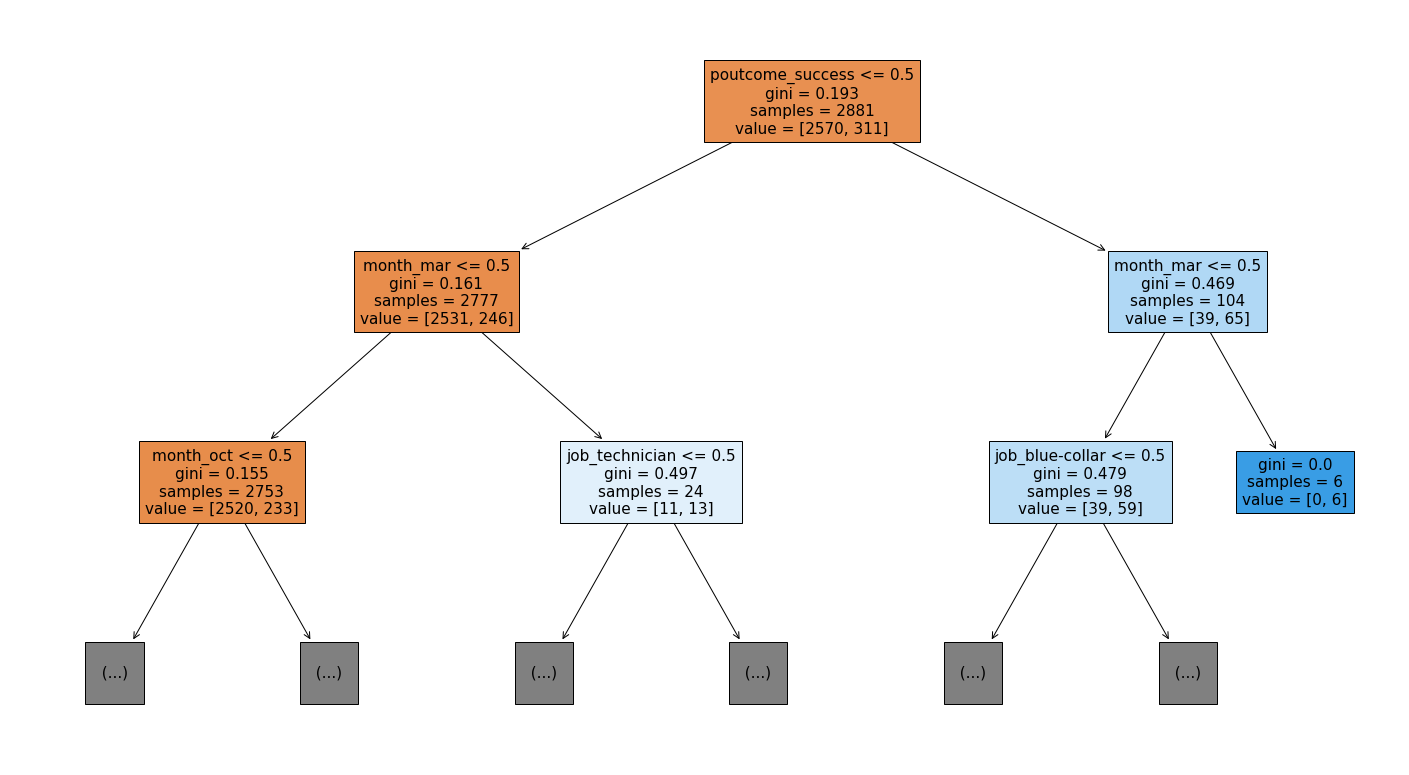

In [30]:
#Plotting the deciision tree.
plt.figure(figsize=(25, 14))
plot_tree(decision_tree, filled=True, feature_names=x_variables, max_depth=2)
plt.show()

####Training the Model

In [31]:
#Making predictions on training and testing dataset
predictions_train = decision_tree.predict(x_train)
predictions_test = decision_tree.predict(x_test)

####Evaluating with Confusion Matrix and Classification Report

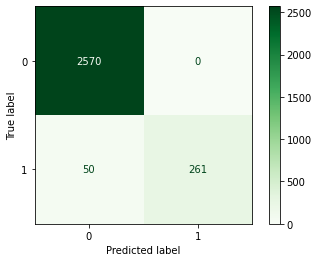

In [32]:
#Plotting confusion matrix for training data set
conf_matrix_train = confusion_matrix(y_train, predictions_train, labels=[0, 1])
ax = ConfusionMatrixDisplay(conf_matrix_train, display_labels=[0, 1])
ax.plot(values_format='', cmap=plt.cm.Greens)
plt.show()

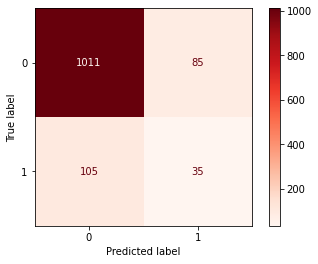

In [33]:
#Plotting confusion matrix for testing data set
conf_matrix_test = confusion_matrix(y_test, predictions_test, labels=[0, 1])
ax = ConfusionMatrixDisplay(conf_matrix_test, display_labels=[0, 1])
ax.plot(values_format='', cmap=plt.cm.Reds)
plt.show()

In [34]:
#Printing classification reports for both sets.
print(f"{'TRAINING SET' :>33}")
print('')
print(classification_report(y_train, predictions_train))
print('-' * 56)
print(f"{'TESTING SET' :>33}")
print('')
print(classification_report(y_test, predictions_test))

                     TRAINING SET

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2570
           1       1.00      0.84      0.91       311

    accuracy                           0.98      2881
   macro avg       0.99      0.92      0.95      2881
weighted avg       0.98      0.98      0.98      2881

--------------------------------------------------------
                      TESTING SET

              precision    recall  f1-score   support

           0       0.91      0.92      0.91      1096
           1       0.29      0.25      0.27       140

    accuracy                           0.85      1236
   macro avg       0.60      0.59      0.59      1236
weighted avg       0.84      0.85      0.84      1236



####Conclusion

The overall perfomance of the model suggests that it has been overfitted. The classification report evidences that the model almost perfectly predicts in the training phase, but the pattern drawn in the testing phase is not actually representative of the testing set. In addition, even though the model performs poorly, it does not behave as a majority classifier as it still makes predictions on "class 1" which is not the majority class. Usually, classifying on an imbalanced data set is harder because the probability of the majority class being chosen is higher and, therefore, the model might tend to only predict on the majority class and cause more false predictions.

##Naive Bayes Model for Hold-Out Evaluation

####Fitting Naive Bayes Model

In [35]:
categorical_nb = CategoricalNB()
categorical_nb = categorical_nb.fit(x_train, y_train)

####Testing NB Model

In [36]:
nb_predictions_train = categorical_nb.predict(x_train)
nb_predictions_test = categorical_nb.predict(x_test)

####Evaluating with Confusion Matrix and Classification Report

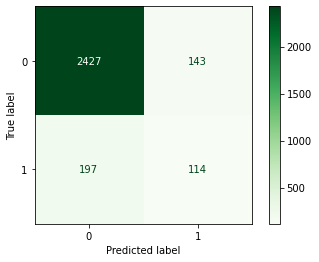

In [37]:
#Plotting confusion matrix for training data set
nb_conf_matrix_train = confusion_matrix(y_train, nb_predictions_train, labels=[0, 1])
ax = ConfusionMatrixDisplay(nb_conf_matrix_train, display_labels=[0, 1])
ax.plot(values_format='', cmap=plt.cm.Greens)
plt.show()

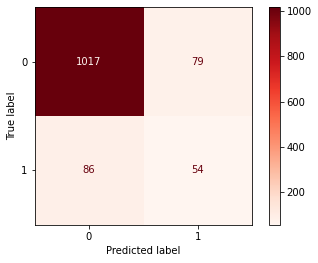

In [38]:
#Plotting confusion matrix for testing data set
nb_conf_matrix_test = confusion_matrix(y_test, nb_predictions_test, labels=[0, 1])
ax = ConfusionMatrixDisplay(nb_conf_matrix_test, display_labels=[0, 1])
ax.plot(values_format='', cmap=plt.cm.Reds)
plt.show()

In [39]:
#Printing classification reports for both sets.
print(f"{'TRAINING SET' :>33}")
print('')
print(classification_report(y_train, nb_predictions_train))
print('-' * 56)
print(f"{'TESTING SET' :>33}")
print('')
print(classification_report(y_test, nb_predictions_test))

                     TRAINING SET

              precision    recall  f1-score   support

           0       0.92      0.94      0.93      2570
           1       0.44      0.37      0.40       311

    accuracy                           0.88      2881
   macro avg       0.68      0.66      0.67      2881
weighted avg       0.87      0.88      0.88      2881

--------------------------------------------------------
                      TESTING SET

              precision    recall  f1-score   support

           0       0.92      0.93      0.92      1096
           1       0.41      0.39      0.40       140

    accuracy                           0.87      1236
   macro avg       0.66      0.66      0.66      1236
weighted avg       0.86      0.87      0.87      1236



####Conclusion

The overall perfomance of the model suggests that it has been underfitted. The classification report evidences that the pattern drawn by the model in the training phase is not actually representative of the training set. In addition, even though the model performs poorly, it does not behave as a majority classifier as it still makes predictions on "class 1" which is not the majority class. In order to fix this behavior, the model's complexity could be increased by either fitting the model with a larger dataset or decreasing parameters that simplify the model if being used, for example.

##Naive Bayes Model for Cross-Validation

In [40]:
#Concatenating x's and verifying if parts add up
x_concatenated = np.concatenate((x_train, x_test), axis=0)
print(x_test.shape, x_train.shape, x_concatenated.shape)

(1236, 51) (2881, 51) (4117, 51)


In [41]:
#Concatenating y's and verifying if parts add up
y_concatenated = np.concatenate((y_train, y_test), axis=0)
print(y_test.shape, y_train.shape, y_concatenated.shape)

(1236,) (2881,) (4117,)


####Using Cross Validation with Decision Tree Model

In [42]:
#Creating Decision Tree Classifier object and fitting cross validation model. cv default is 5
ff_cv_dt = DecisionTreeClassifier()
ff_cross_validation_dt = cross_validate(ff_cv_dt, x_concatenated, y_concatenated)

In [43]:
#Displaying results as dataframe
ff_cross_validation_dt_results = cross_validate(ff_cv_dt, x_concatenated, y_concatenated, scoring=['accuracy','precision','recall','f1'], return_train_score=True)
ff_cv_dt_df = pd.DataFrame(ff_cross_validation_dt_results)

#### Results for each fold

In [44]:
ff_cv_dt_df

,fit_time,score_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1
0,0.022522,0.003623,0.854369,0.980869,0.307692,0.993377,0.266667,0.831025,0.285714,0.904977
1,0.017707,0.003636,0.831311,0.979957,0.250000,1.000000,0.263736,0.816667,0.256684,0.899083
2,0.017111,0.007220,0.833536,0.980267,0.257732,0.996644,0.277778,0.822715,0.267380,0.901366
3,0.016649,0.003685,0.862697,0.979660,0.346667,0.996622,0.288889,0.817175,0.315152,0.898021
4,0.016989,0.003619,0.839611,0.981481,0.243902,1.000000,0.222222,0.831025,0.232558,0.907716


In [45]:
#Finding the mean for each metric in the training and testing test
print(f"Decision Tree Classfier - Five-fold Cross-Validation Training Accuracy: {round(np.mean(ff_cv_dt_df['train_accuracy']), 5)}")
print(f"Decision Tree Classfier - Five-fold Cross-Validation Training Precision: {round(np.mean(ff_cv_dt_df['train_precision']), 5)}")
print(f"Decision Tree Classfier - Five-fold Cross-Validation Training Recall: {round(np.mean(ff_cv_dt_df['train_recall']), 5)}")
print(f"Decision Tree Classfier - Five-fold Cross-Validation Training F-score: {round(np.mean(ff_cv_dt_df['train_f1']), 5)}")
print('')
print(f"Decision Tree Classfier - Five-fold Cross-Validation Testing Accuracy: {round(np.mean(ff_cv_dt_df['test_accuracy']), 5)}")
print(f"Decision Tree Classfier - Five-fold Cross-Validation Testing Precision: {round(np.mean(ff_cv_dt_df['test_precision']), 5)}")
print(f"Decision Tree Classfier - Five-fold Cross-Validation Testing Recall: {round(np.mean(ff_cv_dt_df['test_recall']), 5)}")
print(f"Decision Tree Classfier - Five-fold Cross-Validation Testing F-score: {round(np.mean(ff_cv_dt_df['test_f1']), 5)}")

Decision Tree Classfier - Five-fold Cross-Validation Training Accuracy: 0.98045
Decision Tree Classfier - Five-fold Cross-Validation Training Precision: 0.99733
Decision Tree Classfier - Five-fold Cross-Validation Training Recall: 0.82372
Decision Tree Classfier - Five-fold Cross-Validation Training F-score: 0.90223

Decision Tree Classfier - Five-fold Cross-Validation Testing Accuracy: 0.8443
Decision Tree Classfier - Five-fold Cross-Validation Testing Precision: 0.2812
Decision Tree Classfier - Five-fold Cross-Validation Testing Recall: 0.26386
Decision Tree Classfier - Five-fold Cross-Validation Testing F-score: 0.2715


####Using Cross Validation with Naive Bayes Model

In [46]:
#Creating Categorical Naive Bayes object and fitting cross validation model. cv default is 5
ff_cv_nb = CategoricalNB()
ff_cross_validation_nb = cross_validate(ff_cv_nb, x_concatenated, y_concatenated)

In [47]:
#Displaying results as dataframe
ff_cross_validation_nb_results = cross_validate(ff_cv_nb, x_concatenated, y_concatenated, scoring=['accuracy','precision','recall','f1'], return_train_score=True)
ff_cv_nb_df = pd.DataFrame(ff_cross_validation_nb_results)

#### Results for each fold

In [48]:
ff_cv_nb_df

,fit_time,score_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1
0,0.013550,0.004370,0.883495,0.885515,0.457143,0.471223,0.355556,0.362881,0.400000,0.410016
1,0.008726,0.006219,0.879854,0.887033,0.437500,0.478571,0.307692,0.372222,0.361290,0.418750
2,0.008842,0.004721,0.876063,0.877049,0.414286,0.430818,0.322222,0.379501,0.362500,0.403535
3,0.009377,0.004322,0.879708,0.880692,0.450549,0.444056,0.455556,0.351801,0.453039,0.392581
4,0.009076,0.004294,0.876063,0.879478,0.416667,0.441558,0.333333,0.376731,0.370370,0.406577


In [49]:
#Finding the mean for each metric in the training and testing test
print(f"Categorical Naive Bayes - Five-fold Cross-Validation Training Accuracy: {round(np.mean(ff_cv_nb_df['train_accuracy']), 5)}")
print(f"Categorical Naive Bayes - Five-fold Cross-Validation Training Precision: {round(np.mean(ff_cv_nb_df['train_precision']), 5)}")
print(f"Categorical Naive Bayes - Five-fold Cross-Validation Training Recall: {round(np.mean(ff_cv_nb_df['train_recall']), 5)}")
print(f"Categorical Naive Bayes - Five-fold Cross-Validation Training F-score: {round(np.mean(ff_cv_nb_df['train_f1']), 5)}")
print('')
print(f"Categorical Naive Bayes - Five-fold Cross-Validation Testing Accuracy: {round(np.mean(ff_cv_nb_df['test_accuracy']), 5)}")
print(f"Categorical Naive Bayes - Five-fold Cross-Validation Testing Precision: {round(np.mean(ff_cv_nb_df['test_precision']), 5)}")
print(f"Categorical Naive Bayes - Five-fold Cross-Validation Testing Recall: {round(np.mean(ff_cv_nb_df['test_recall']), 5)}")
print(f"Categorical Naive Bayes - Five-fold Cross-Validation Testing F-score: {round(np.mean(ff_cv_nb_df['test_f1']), 5)}")

Categorical Naive Bayes - Five-fold Cross-Validation Training Accuracy: 0.88195
Categorical Naive Bayes - Five-fold Cross-Validation Training Precision: 0.45325
Categorical Naive Bayes - Five-fold Cross-Validation Training Recall: 0.36863
Categorical Naive Bayes - Five-fold Cross-Validation Training F-score: 0.40629

Categorical Naive Bayes - Five-fold Cross-Validation Testing Accuracy: 0.87904
Categorical Naive Bayes - Five-fold Cross-Validation Testing Precision: 0.43523
Categorical Naive Bayes - Five-fold Cross-Validation Testing Recall: 0.35487
Categorical Naive Bayes - Five-fold Cross-Validation Testing F-score: 0.38944


###Repeating Process for a Ten-Fold Cross Validation

In [50]:
#Creating Decision Tree Classifier object and fitting cross validation model.
tf_cv_dt = DecisionTreeClassifier()
tf_cross_validation_dt = cross_validate(ff_cv_dt, x_concatenated, y_concatenated, cv=10)

In [51]:
#Displaying results as dataframe
tf_cross_validation_dt_results = cross_validate(tf_cv_dt, x_concatenated, y_concatenated, scoring=['accuracy','precision','recall','f1'], cv=10, return_train_score=True)
tf_cv_dt_df = pd.DataFrame(tf_cross_validation_dt_results)

In [52]:
tf_cv_dt_df

,fit_time,score_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1
0,0.025221,0.006431,0.856796,0.979487,0.325000,0.996988,0.288889,0.815271,0.305882,0.897019
1,0.019971,0.003210,0.847087,0.979217,0.326923,0.993994,0.377778,0.815271,0.350515,0.895805
2,0.020424,0.003162,0.832524,0.978947,0.239130,1.000000,0.244444,0.807882,0.241758,0.893733
3,0.023643,0.003222,0.817961,0.979217,0.200000,1.000000,0.222222,0.810345,0.210526,0.895238
4,0.019491,0.003160,0.808252,0.979217,0.075000,0.996979,0.066667,0.812808,0.070588,0.895522
5,0.020055,0.003205,0.842233,0.979217,0.261905,0.996979,0.244444,0.812808,0.252874,0.895522
6,0.019566,0.003119,0.868932,0.977598,0.404762,0.996914,0.369565,0.797531,0.386364,0.886145
7,0.023568,0.003190,0.827251,0.979493,0.204545,0.996988,0.200000,0.815271,0.202247,0.897019
8,0.020088,0.003299,0.829684,0.980032,0.234043,0.997006,0.244444,0.820197,0.239130,0.900000
9,0.023076,0.003232,0.854015,0.979223,0.317073,1.000000,0.288889,0.810345,0.302326,0.895238


In [53]:
#Finding the mean for each metric in the training and testing test
print(f"Decision Tree Classfier - Ten-fold Cross-Validation Training Accuracy: {round(np.mean(tf_cv_dt_df['train_accuracy']), 5)}")
print(f"Decision Tree Classfier - Ten-fold Cross-Validation Training Precision: {round(np.mean(tf_cv_dt_df['train_precision']), 5)}")
print(f"Decision Tree Classfier - Ten-fold Cross-Validation Training Recall: {round(np.mean(tf_cv_dt_df['train_recall']), 5)}")
print(f"Decision Tree Classfier - Ten-fold Cross-Validation Training F-score: {round(np.mean(tf_cv_dt_df['train_f1']), 5)}")
print('')
print(f"Decision Tree Classfier - Ten-fold Cross-Validation Testing Accuracy: {round(np.mean(tf_cv_dt_df['test_accuracy']), 5)}")
print(f"Decision Tree Classfier - Ten-fold Cross-Validation Testing Precision: {round(np.mean(tf_cv_dt_df['test_precision']), 5)}")
print(f"Decision Tree Classfier - Ten-fold Cross-Validation Testing Recall: {round(np.mean(tf_cv_dt_df['test_recall']), 5)}")
print(f"Decision Tree Classfier - Ten-fold Cross-Validation Testing F-score: {round(np.mean(tf_cv_dt_df['test_f1']), 5)}")

Decision Tree Classfier - Ten-fold Cross-Validation Training Accuracy: 0.97916
Decision Tree Classfier - Ten-fold Cross-Validation Training Precision: 0.99758
Decision Tree Classfier - Ten-fold Cross-Validation Training Recall: 0.81177
Decision Tree Classfier - Ten-fold Cross-Validation Training F-score: 0.89512

Decision Tree Classfier - Ten-fold Cross-Validation Testing Accuracy: 0.83847
Decision Tree Classfier - Ten-fold Cross-Validation Testing Precision: 0.25884
Decision Tree Classfier - Ten-fold Cross-Validation Testing Recall: 0.25473
Decision Tree Classfier - Ten-fold Cross-Validation Testing F-score: 0.25622


In [54]:
#Creating Categorical Naive Bayes object and fitting cross validation model. cv=10
tf_cv_nb = CategoricalNB()
tf_cross_validation_nb = cross_validate(tf_cv_nb, x_concatenated, y_concatenated, cv=10)

In [55]:
#Displaying results as dataframe
tf_cross_validation_nb_results = cross_validate(tf_cv_nb, x_concatenated, y_concatenated, scoring=['accuracy','precision','recall','f1'], cv=10, return_train_score=True)
tf_cv_nb_df = pd.DataFrame(tf_cross_validation_nb_results)

In [56]:
tf_cv_nb_df

,fit_time,score_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1
0,0.014886,0.003534,0.888350,0.882051,0.485714,0.452599,0.377778,0.364532,0.425000,0.403820
1,0.011544,0.003496,0.876214,0.884750,0.421053,0.467085,0.355556,0.366995,0.385542,0.411034
2,0.009465,0.004084,0.881068,0.883671,0.441176,0.460815,0.333333,0.362069,0.379747,0.405517
3,0.009277,0.003707,0.881068,0.883131,0.428571,0.458716,0.266667,0.369458,0.328767,0.409277
4,0.009740,0.003611,0.873786,0.879892,0.387097,0.445378,0.266667,0.391626,0.315789,0.416776
5,0.009518,0.003424,0.873786,0.880432,0.405405,0.444444,0.333333,0.364532,0.365854,0.400541
6,0.009205,0.003456,0.905340,0.877733,0.589744,0.427711,0.500000,0.350617,0.541176,0.385346
7,0.009183,0.003468,0.856448,0.883162,0.365385,0.457944,0.422222,0.362069,0.391753,0.404402
8,0.009345,0.003477,0.888078,0.879655,0.481481,0.442857,0.288889,0.381773,0.361111,0.410053
9,0.009344,0.003474,0.871046,0.882083,0.404762,0.452599,0.377778,0.364532,0.390805,0.403820


In [57]:
#Finding the mean for each metric in the training and testing test
print(f"Categorical Naive Bayes - Ten-fold Cross-Validation Training Accuracy: {round(np.mean(tf_cv_nb_df['train_accuracy']), 5)}")
print(f"Categorical Naive Bayes - Ten-fold Cross-Validation Training Precision: {round(np.mean(tf_cv_nb_df['train_precision']), 5)}")
print(f"Categorical Naive Bayes - Ten-fold Cross-Validation Training Recall: {round(np.mean(tf_cv_nb_df['train_recall']), 5)}")
print(f"Categorical Naive Bayes - Ten-fold Cross-Validation Training F-score: {round(np.mean(tf_cv_nb_df['train_f1']), 5)}")
print('')
print(f"Categorical Naive Bayes - Ten-fold Cross-Validation Testing Accuracy: {round(np.mean(tf_cv_nb_df['test_accuracy']), 5)}")
print(f"Categorical Naive Bayes - Ten-fold Cross-Validation Testing Precision: {round(np.mean(tf_cv_nb_df['test_precision']), 5)}")
print(f"Categorical Naive Bayes - Ten-fold Cross-Validation Testing Recall: {round(np.mean(tf_cv_nb_df['test_recall']), 5)}")
print(f"Categorical Naive Bayes - Ten-fold Cross-Validation Testing F-score: {round(np.mean(tf_cv_nb_df['test_f1']), 5)}")

Categorical Naive Bayes - Ten-fold Cross-Validation Training Accuracy: 0.88166
Categorical Naive Bayes - Ten-fold Cross-Validation Training Precision: 0.45101
Categorical Naive Bayes - Ten-fold Cross-Validation Training Recall: 0.36782
Categorical Naive Bayes - Ten-fold Cross-Validation Training F-score: 0.40506

Categorical Naive Bayes - Ten-fold Cross-Validation Testing Accuracy: 0.87952
Categorical Naive Bayes - Ten-fold Cross-Validation Testing Precision: 0.44104
Categorical Naive Bayes - Ten-fold Cross-Validation Testing Recall: 0.35222
Categorical Naive Bayes - Ten-fold Cross-Validation Testing F-score: 0.38855


####Conclusions

In general all 4 models perform poorly. Analyzing the two models elaborated using five-fold cross validation, while the DecisionTreeClassifier was overfitted, the Categorical Naive Bayes indicates an underfitting behavior. The same is true when comparing both models using the ten-fold cross validatidation. In general, regardless of the number of folds, Decision Trees and CategoricalNBs behave very similarly.

Train-test hold-out is a technique that consists of splitting the dataset based on a specfic percetage (e.g., 70% for training and 30% for testing). This way, only the training set is used to fit the model whereas the testing set is treated as a totally unknown dataset that is used for predictions. Cross validation, on the other hand, divides the dataset into folds and each fold will be used as the testing set once. If the cross-validation is not using a hold-out approach, then the "testing fold" is also included in the training phase. If the cross-validation is using a true hold-out, then only one fold is used for testing and the remainder will constitue a training set with a validation fold. Thus, in practice, if there are 5 folds in total, 1 will be exclusively used for testing and the other 4 will consitute 4 different training sets where on each model one of those 4 folds will be the validation/pseudo-test.